In [1]:
import torch
import matplotlib.pyplot as plt
import torchvision as tv 

In [2]:
root_dir = 'dataset/train_kana'
batch_size = 4
num_workers = 4
num_epochs = 2

In [3]:
data_transform = tv.transforms.Compose([
        tv.transforms.Grayscale(),
        tv.transforms.Resize((32, 32)),
        tv.transforms.ToTensor()
    ])

kana_dataset = tv.datasets.ImageFolder(root=root_dir,
                                   transform=data_transform)

In [4]:
num_classes = len(kana_dataset.classes)

In [5]:
for i in range(len(kana_dataset)):
    sample = kana_dataset[i]
    img, label = sample
    print(i, img.size(), torch.tensor(label).size())

    if i == 3:
        break

0 torch.Size([1, 32, 32]) torch.Size([])
1 torch.Size([1, 32, 32]) torch.Size([])
2 torch.Size([1, 32, 32]) torch.Size([])
3 torch.Size([1, 32, 32]) torch.Size([])


In [6]:
train_size = int(0.8 * len(kana_dataset))
test_size = len(kana_dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(kana_dataset, [train_size, test_size])

In [7]:
len(train_dataset), len(test_dataset)

(310516, 77629)

In [8]:
train_dataset_loader = torch.utils.data.DataLoader(train_dataset,
                                             batch_size=batch_size, shuffle=True,
                                             num_workers=num_workers)

train_dataset_loader = torch.utils.data.DataLoader(train_dataset,
                                             batch_size=batch_size, shuffle=True,
                                             num_workers=num_workers)

0 torch.Size([4, 1, 32, 32]) torch.Size([4])
1 torch.Size([4, 1, 32, 32]) torch.Size([4])
2 torch.Size([4, 1, 32, 32]) torch.Size([4])
3 torch.Size([4, 1, 32, 32]) torch.Size([4])


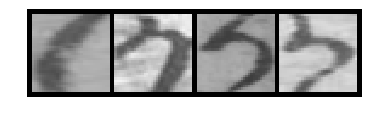

In [9]:
for i_batch, sample_batched in enumerate(train_dataset_loader):
    print(i_batch, sample_batched[0].size(),
          sample_batched[1].size())

    # observe 4th batch and stop.
    if i_batch == 3:
        plt.figure()
        grid = tv.utils.make_grid(sample_batched[0])
        plt.imshow(grid.numpy().transpose((1, 2, 0)))
        plt.axis('off')
        plt.ioff()
        plt.show()
        break

In [10]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, num_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net = net.to(device)

In [11]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [12]:
for epoch in range(num_epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_dataset_loader, 0):
        # get the inputs
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 3.668


KeyboardInterrupt: 